<a href="https://colab.research.google.com/github/DeepakDayanandan1/AI-ML-Intership/blob/main/AI_ML_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREPROCESSING**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = {
    "Name": ["Alice","Bob","Charlie","David","Eve"],
    "Age" : [25,None,30,None,40],
    "Salary" : [50000,60000,None,80000,None],
    "City" : ["New York",None,"San Francisco","Los Angeles","Chicago"]
}

df = pd.DataFrame(data)
df

,Name,Age,Salary,City
0,Alice,25.0,50000.0,New York
1,Bob,NaN,60000.0,None
2,Charlie,30.0,NaN,San Francisco
3,David,NaN,80000.0,Los Angeles
4,Eve,40.0,NaN,Chicago


In [ ]:
df.isna().sum()

,0
Name,0
Age,2
Salary,2
City,1


In [ ]:
df.fillna("Unknown")

,Name,Age,Salary,City
0,Alice,25.0,50000.0,New York
1,Bob,Unknown,60000.0,Unknown
2,Charlie,30.0,Unknown,San Francisco
3,David,Unknown,80000.0,Los Angeles
4,Eve,40.0,Unknown,Chicago


In [ ]:
df.ffill()

,Name,Age,Salary,City
0,Alice,25.0,50000.0,New York
1,Bob,25.0,60000.0,New York
2,Charlie,30.0,60000.0,San Francisco
3,David,30.0,80000.0,Los Angeles
4,Eve,40.0,80000.0,Chicago


In [ ]:
df.bfill()

,Name,Age,Salary,City
0,Alice,25.0,50000.0,New York
1,Bob,30.0,60000.0,San Francisco
2,Charlie,30.0,80000.0,San Francisco
3,David,40.0,80000.0,Los Angeles
4,Eve,40.0,NaN,Chicago


In [ ]:
df.fillna({'Age':df['Age'].mean(),
          'Salary':df['Salary'].median()})

,Name,Age,Salary,City
0,Alice,25.000000,50000.0,New York
1,Bob,31.666667,60000.0,None
2,Charlie,30.000000,60000.0,San Francisco
3,David,31.666667,80000.0,Los Angeles
4,Eve,40.000000,60000.0,Chicago


In [ ]:
df.dropna(how="all")

,Name,Age,Salary,City
0,Alice,25.0,50000.0,New York
1,Bob,NaN,60000.0,None
2,Charlie,30.0,NaN,San Francisco
3,David,NaN,80000.0,Los Angeles
4,Eve,40.0,NaN,Chicago


In [ ]:
df.dropna(axis=1)

,Name
0,Alice
1,Bob
2,Charlie
3,David
4,Eve


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: xlabel='age', ylabel='Count'>

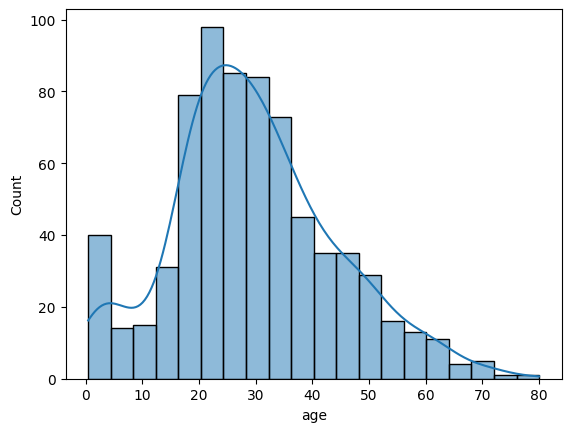

In [ ]:
sns.histplot(data=df, x="age", kde=True)

In [ ]:
import matplotlib as plt

In [ ]:
df.drop(columns = ['class','embark_town','alive','deck'],inplace=True)

df['age'] = df['age'].fillna(df['age'].mean())

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
who,0
adult_male,0


In [ ]:
df['embarked'].value_counts()

,count
embarked,
S,646
C,168
Q,77


In [ ]:
df['embarked'].mode()[0]

'S'

In [ ]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,man,True,False,2
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False,2
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True,1
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False,2
4,0,3,male,35.0,0,0,8.0500,S,man,True,True,1


<Axes: >

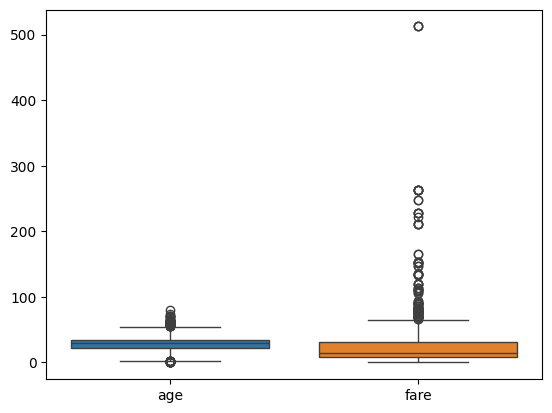

In [ ]:
sns.boxplot((df['age'],df['fare']))

In [ ]:
#handling age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR =Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

df['age'] = df['age'].clip(lower_bound,upper_bound)

22.0 35.0 13.0 2.5 54.5


In [ ]:
#handling fare
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR =Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

df['fare'] = df['fare'].clip(lower_bound,upper_bound)

7.9104 31.0 23.0896 -26.724 65.6344


<Axes: >

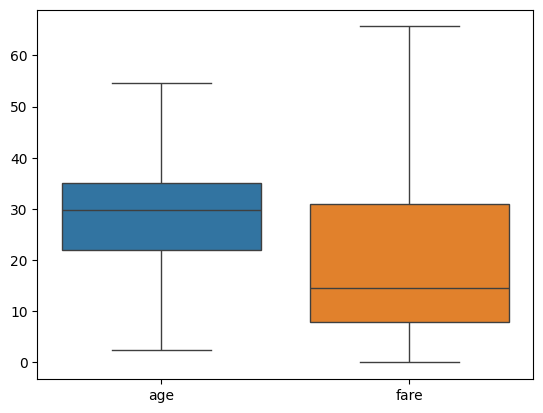

In [ ]:
sns.boxplot((df['age'],df['fare']))

In [ ]:
df['adult_male'] = df['adult_male'].astype(int)
df['alone'] = df['alone'].map({True:1,False:0})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,man,1,0,2
1,1,1,female,38.0,1,0,65.6344,C,woman,0,0,2
2,1,3,female,26.0,0,0,7.9250,S,woman,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,woman,0,0,2
4,0,3,male,35.0,0,0,8.0500,S,man,1,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,family_size
0,0,3,1,22.0,1,0,7.2500,S,man,1,0,2
1,1,1,0,38.0,1,0,65.6344,C,woman,0,0,2
2,1,3,0,26.0,0,0,7.9250,S,woman,0,1,1
3,1,1,0,35.0,1,0,53.1000,S,woman,0,0,2
4,0,3,1,35.0,0,0,8.0500,S,man,1,1,1


In [ ]:
df['embarked'] = le.fit_transform(df['embarked'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,family_size
0,0,3,1,22.0,1,0,7.2500,2,man,1,0,2
1,1,1,0,38.0,1,0,65.6344,0,woman,0,0,2
2,1,3,0,26.0,0,0,7.9250,2,woman,0,1,1
3,1,1,0,35.0,1,0,53.1000,2,woman,0,0,2
4,0,3,1,35.0,0,0,8.0500,2,man,1,1,1


In [ ]:
import pandas as pd
data = pd.get_dummies(df,columns=['who'],dtype=int,drop_first=True)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone,family_size,who_man,who_woman
0,0,3,1,22.000000,1,0,7.2500,2,1,0,2,1,0
1,1,1,0,38.000000,1,0,65.6344,0,0,0,2,0,1
2,1,3,0,26.000000,0,0,7.9250,2,0,1,1,0,1
3,1,1,0,35.000000,1,0,53.1000,2,0,0,2,0,1
4,0,3,1,35.000000,0,0,8.0500,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,1,1,0
887,1,1,0,19.000000,0,0,30.0000,2,0,1,1,0,1
888,0,3,0,29.699118,1,2,23.4500,2,0,0,4,0,1
889,1,1,1,26.000000,0,0,30.0000,0,1,1,1,1,0


In [ ]:
num_cols = ['age','fare']
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sd = StandardScaler()
df_scaled = data.copy()
df_scaled[num_cols] = sd.fit_transform(data[num_cols])
df_scaled.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone,family_size,who_man,who_woman
0,0,3,1,-0.611917,1,0,-0.820552,2,1,0,2,1,0
1,1,1,0,0.715304,1,0,2.031623,0,0,0,2,0,1
2,1,3,0,-0.280111,0,0,-0.787578,2,0,1,1,0,1
3,1,1,0,0.466450,1,0,1.419297,2,0,0,2,0,1
4,0,3,1,0.466450,0,0,-0.781471,2,1,1,1,1,0


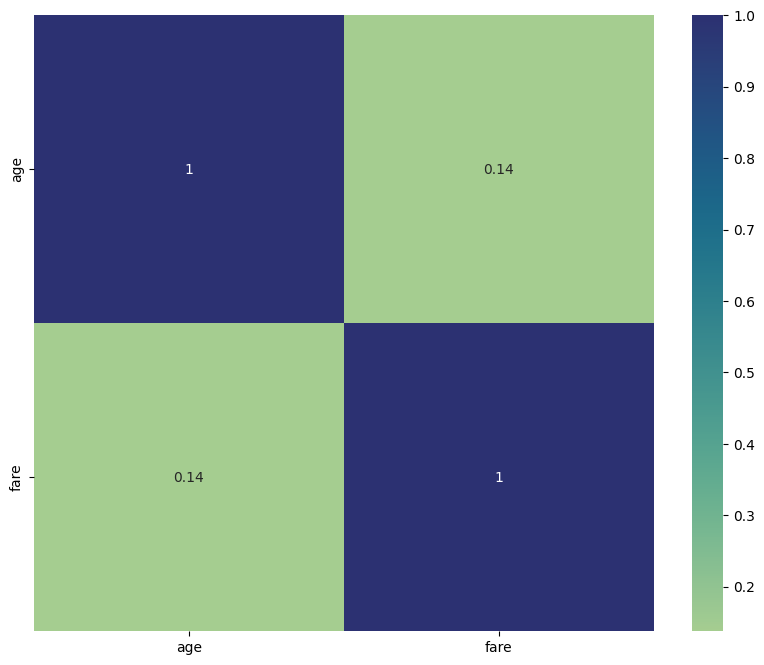

In [ ]:
import matplotlib.pyplot as plt
corr_matrix = df_scaled[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

In [ ]:
df = MinMaxScaler()
df_scaled1 = data.copy()
df_scaled[num_cols] = sd.fit_transform(data[num_cols])
df_scaled.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone,family_size,who_man,who_woman
0,0,3,1,-0.611917,1,0,-0.820552,2,1,0,2,1,0
1,1,1,0,0.715304,1,0,2.031623,0,0,0,2,0,1
2,1,3,0,-0.280111,0,0,-0.787578,2,0,1,1,0,1
3,1,1,0,0.466450,1,0,1.419297,2,0,0,2,0,1
4,0,3,1,0.466450,0,0,-0.781471,2,1,1,1,1,0


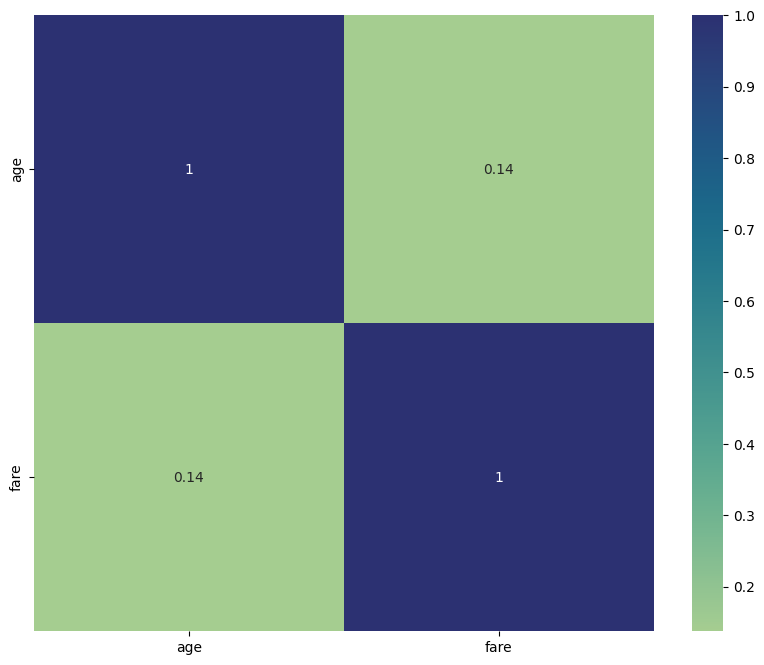

In [ ]:
import matplotlib.pyplot as plt
corr_matrix = df_scaled1[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

In [ ]:
df_scaled.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone,family_size,who_man,who_woman
count,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,7.974666e-18,0.523008,0.381594,9.968332e-17,1.536476,0.602694,0.602694,1.904602,0.602694,0.304153
std,0.486592,0.836071,0.477990,1.000562e+00,1.102743,0.806057,1.000562e+00,0.791503,0.489615,0.489615,1.613459,0.489615,0.460306
min,0.000000,1.000000,0.000000,-2.229467e+00,0.000000,0.000000,-1.174727e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,-6.119166e-01,0.000000,0.000000,-7.882908e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,2.673527e-02,0.000000,0.000000,-4.686152e-01,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,4.664504e-01,1.000000,0.000000,3.396748e-01,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,2.084001e+00,8.000000,6.000000,2.031623e+00,2.000000,1.000000,1.000000,11.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
y= data['survived']
x = data.drop(columns= ['survived'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 12) (179, 12) (712,) (179,)


In [ ]:
x_test.index

Index([709, 439, 840, 720,  39, 290, 300, 333, 208, 136,
       ...
       363,  97, 417, 572, 852, 433, 773,  25,  84,  10],
      dtype='int64', length=179)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr_model = lr.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)

print(accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

0.8100558659217877
[[91 14]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**AI-ML_Day 4**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []

for k in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_model = knn.fit(x_train,y_train)
  knn_pred = knn_model.predict(x_test)
  metric_k.append(accuracy_score(y_test,knn_pred))

metric_k

[0.7374301675977654,
 0.6983240223463687,
 0.7374301675977654,
 0.7541899441340782,
 0.7374301675977654,
 0.7541899441340782,
 0.7374301675977654,
 0.7541899441340782,
 0.7597765363128491,
 0.7486033519553073,
 0.7541899441340782,
 0.7430167597765364,
 0.7486033519553073,
 0.7262569832402235,
 0.7486033519553073,
 0.7318435754189944,
 0.7318435754189944,
 0.7094972067039106,
 0.7094972067039106]

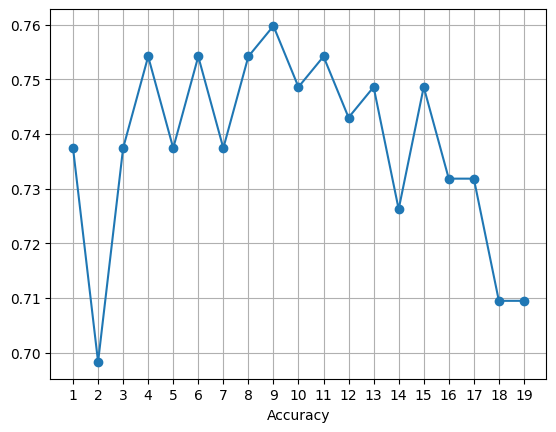

In [ ]:
import matplotlib.pyplot as pltr
plt.plot(range(1,20),metric_k,marker="o")
plt.grid()
plt.xlabel("K value")
plt.xlabel("Accuracy")
plt.xticks(range(1,20))
plt.show()

In [ ]:

knn = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)
metric_k

[0.7374301675977654,
 0.6983240223463687,
 0.7374301675977654,
 0.7541899441340782,
 0.7374301675977654,
 0.7541899441340782,
 0.7374301675977654,
 0.7541899441340782,
 0.7597765363128491,
 0.7486033519553073,
 0.7541899441340782,
 0.7430167597765364,
 0.7486033519553073,
 0.7262569832402235,
 0.7486033519553073,
 0.7318435754189944,
 0.7318435754189944,
 0.7094972067039106,
 0.7094972067039106]

In [ ]:

print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.7597765363128491
[[87 18]
 [25 49]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       105
           1       0.73      0.66      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)

print(accuracy_score(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

0.776536312849162
[[85 20]
 [20 54]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=10,min_samples_leaf=5,random_state=3)
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)

print(accuracy_score(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

0.8100558659217877
[[92 13]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

0.8268156424581006
[[91 14]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_model_tuned = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5,min_samples_leaf=5,random_state=42,max_features='sqrt')

rf_model_tuned.fit(x_train,y_train)
rf_pred_tuned = rf_model_tuned.predict(x_test)

print(accuracy_score(y_test,rf_pred_tuned))
print(confusion_matrix(y_test,rf_pred_tuned))
print(classification_report(y_test,rf_pred_tuned))

rf_model_tuned.get_params()

0.8100558659217877
[[92 13]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}